In [57]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import seaborn as sns
import random

## Listing all files, number of images in whole dataset

In [58]:
files = glob.glob('cells_final/*/*')
print(files[:5])
print(len(files))

['cells_final/tumor/aug_23965_PanNuke_neoplastic_img_1812_intensity_142.png', 'cells_final/tumor/aug_6558_PanNuke_neoplastic_img_985_intensity_1045.png', 'cells_final/tumor/aug_29532_PanNuke_neoplastic_img_2678_intensity_28.png', 'cells_final/tumor/PanNuke_neoplastic_img_1189_intensity_1000.png', 'cells_final/tumor/PanNuke_neoplastic_img_1970_intensity_192.png']
310000


## Number of images per class
  + inflamatory
  + normal
  + tumor
  + other

In [59]:
classes = ['inflamatory', 'normal', 'tumor', 'other']
inflamatory = glob.glob('cells_final/inflammatory/*')
normal = glob.glob('cells_final/normal/*')
tumor = glob.glob('cells_final/tumor/*')
other = glob.glob('cells_final/other/*')
dataset = [inflamatory, normal, tumor, other]
for data, cls in zip(dataset, classes):
    print(f'{cls} : {len(data)}')

inflamatory : 100000
normal : 100000
tumor : 100000
other : 10000


In [60]:
inflamatory_pannuke = random.sample([file for file in inflamatory if "PanNuke" in file], 500)
inflamatory_monusac = random.sample([file for file in inflamatory if "MoNuSAC" in file], 500)
other_test = random.sample(other, 100)
tumor_test = random.sample(tumor, 1000)
normal_test = random.sample(normal, 1000)

print('inflamatory: ', len(inflamatory_pannuke) + len(inflamatory_monusac))
print('other_test: ', len(other_test))
print('tumor_test: ', len(tumor_test))
print('normal_test: ', len(normal_test))

inflamatory:  1000
other_test:  100
tumor_test:  1000
normal_test:  1000


In [62]:
def save_images(files, dataset_type, class_): 
    log = open(f'{dataset_type}/data_{class_}.txt', 'a')
    for file in files:
        log.write(f'{file}\n')
    log.close()


if len(os.listdir('test_data')) > 0:
    for file in os.listdir('test_data'):
        os.remove(f'test_data/{file}')
save_images(inflamatory_pannuke, 'test_data','inflamatory_test')
save_images(inflamatory_monusac, 'test_data','inflamatory_test')
save_images(other_test, 'test_data','other_test')
save_images(tumor_test, 'test_data','tumor_test')
save_images(normal_test, 'test_data','normal_test')
    

In [63]:
def set_data_without_test(dataset, test_dataset):
    for category, test_category in zip(dataset, test_dataset):
        for file in test_category:
            if file in category:
                category.remove(file)
    return dataset
    

In [64]:
inflamatory_monusac.extend(inflamatory_pannuke)

In [65]:
dataset = set_data_without_test(dataset=[inflamatory,normal,tumor,other], test_dataset=[inflamatory_monusac, normal_test, tumor_test, other_test])

In [66]:
for data, cls in zip(dataset, classes):
    print(f'{cls} : {len(data)}')
    save_images(data, 'data_without_test', cls)

inflamatory : 99000
normal : 99000
tumor : 99000
other : 9900


In [11]:
from utils_cells import get_images_list
len(get_images_list('data_without_test/data_inflamatory.txt'))

ImportError: cannot import name 'get_images_list' from 'utils_cells' (/home/adam/Desktop/cells_master_thesis/utils_cells.py)

In [4]:
class Data:
    def __init__(self, dataset, classes):
        self.data = dataset
        self.classes = classes

    def load_image(self, image_path):
        return plt.imread(image_path)

    def get_images_shapes(self):
        size = []
        for data_class in range(len(self.data)):
            for image_path in self.data[data_class]:
                image = self.load_image(image_path)
                size.append([image.shape[0], image.shape[1], data_class])
        return np.array(size)

    def plot_2D(self):
        sizes = self.get_images_shapes()
        sns.scatterplot(x=sizes[:, 0], y=sizes[:, 1], hue=sizes[:, 2])
        plt.ylabel('Height')
        plt.xlabel('Width')
        plt.legend(self.classes)
        plt.show()  

    def plot_classes_2D(self, idx):
        sizes = self.get_images_shapes()
        sizes = sizes[sizes[:, 2]== idx]
        sns.scatterplot(x=sizes[:, 0], y=sizes[:, 1], hue=sizes[:, 2])
        plt.title(self.classes[idx])
        plt.ylabel('Height')
        plt.xlabel('Width')
        plt.show()  



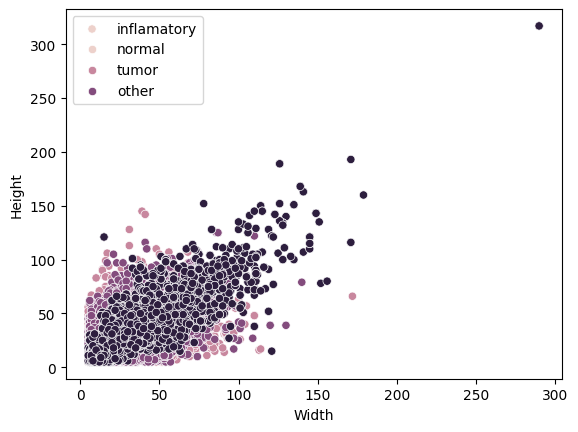

In [5]:
data_loader = Data(dataset, classes)
data_loader.plot_2D()

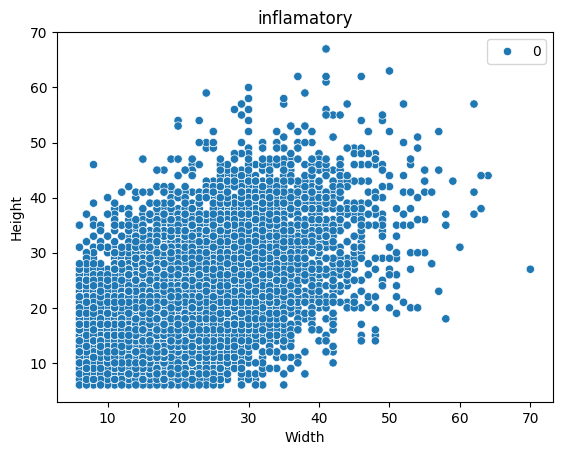

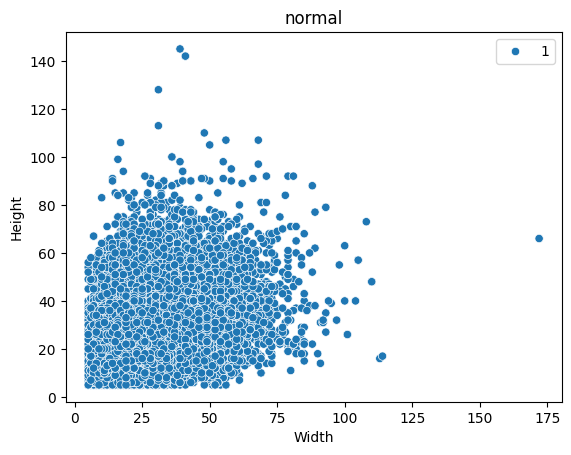

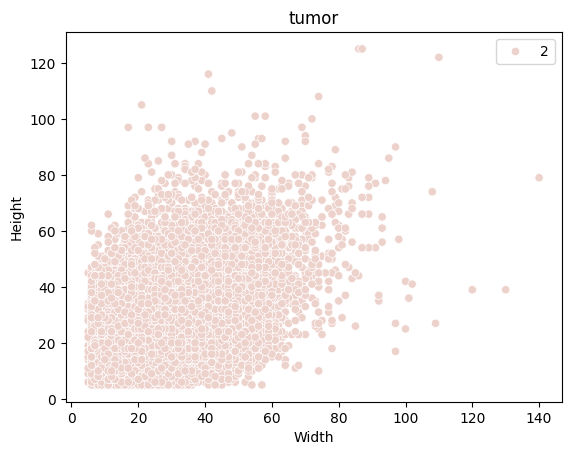

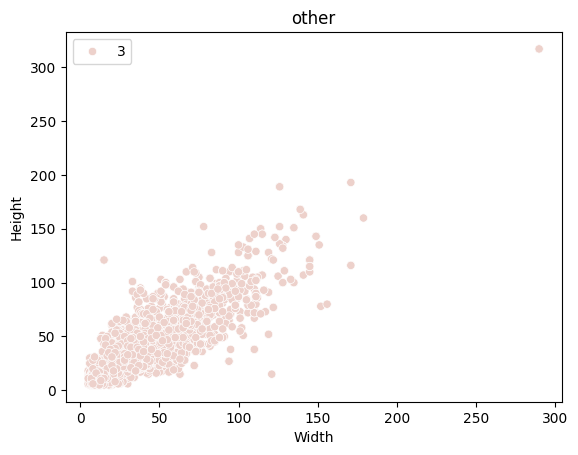

In [6]:
data_loader.plot_classes_2D(0)
data_loader.plot_classes_2D(1)
data_loader.plot_classes_2D(2)
data_loader.plot_classes_2D(3)